In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
# Load datasets
neg_clicked = pd.read_csv('neg_click.csv')
pos_clicked = pd.read_csv('pos_click.csv')

# Add a target column to each dataset
neg_clicked['clicked'] = 0
pos_clicked['clicked'] = 1

# Combine the datasets
sampled_df = pd.concat([neg_clicked, pos_clicked], ignore_index=True)



sampled_df.drop(['clicked_1'], axis= 1, inplace= True  )

# Separate features and target
X = sampled_df.drop(columns=['clicked'])
y = sampled_df['clicked'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [35]:
rf = RandomForestRegressor(max_depth= 2, random_state=100)
rf. fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [36]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [38]:
rf_results = pd.DataFrame({
    'method': ['random forest'],
    'training mse': [rf_train_mse],
    'training R2': [rf_train_r2],
    'test MSE': [rf_test_mse],
    'Test R2': [rf_test_r2]
})
rf_results.columns = ['method', 'training mse', 'training R2', 'test MSE', 'Test R2']

In [39]:
rf_results

,method,training mse,training R2,test MSE,Test R2
0,random forest,0.00238,0.975626,0.00229,0.976551


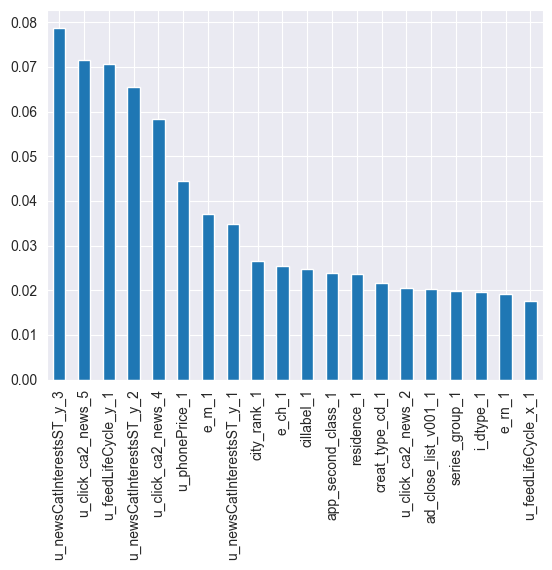

In [40]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
#train a classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



# Determine feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
feature_importances.head(20).plot(kind='bar')
plt.show()

In [41]:
feature_importances

u_newsCatInterestsST_y_3    0.078806
u_click_ca2_news_5          0.071585
u_feedLifeCycle_y_1         0.070577
u_newsCatInterestsST_y_2    0.065519
u_click_ca2_news_4          0.058302
                              ...   
ad_close_list_v003_5        0.000000
u_newsCatDislike_1          0.000000
u_newsCatDislike_2          0.000000
u_newsCatDislike_3          0.000000
label_x_1                   0.000000
Length: 88, dtype: float64

In [42]:

#run a logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


C:\Users\Eric\PycharmProjects\exercise set 3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [43]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')


Accuracy: 0.947


In [44]:
# Get the coefficients and the feature names
coefficients = lr.coef_[0]
feature_names = X.columns

#find the coeffient and odds ratios for each variables
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Odds Ratio', ascending=False)
coef_df


,Feature,Coefficient,Odds Ratio
69,u_newsCatInterestsST_y_5,0.007655,1.007684
68,u_newsCatInterestsST_y_4,0.007450,1.007478
67,u_newsCatInterestsST_y_3,0.006131,1.006150
65,u_newsCatInterestsST_y_1,0.005682,1.005698
66,u_newsCatInterestsST_y_2,0.005573,1.005589
...,...,...,...
76,i_cat_1,-0.001242,0.998759
77,i_dislikeTimes_1,-0.001278,0.998723
71,u_click_ca2_news_2,-0.001703,0.998298
70,u_click_ca2_news_1,-0.002267,0.997736


In [45]:
#  increasing ads certain feature group by certain percentage would increase click rate by Y% 
def calculate_impact(feature, percentage_increase = 80):# increase the percentage by 80 on certain feature
    original_value = X[feature].mean()
    new_value = original_value * (1 + percentage_increase / 100)
    impact = lr.predict_proba(X.mean().values.reshape(1, -1))[0][1]  #riginal probability
    X_mean_updated = X.mean().copy()
    X_mean_updated[feature] = new_value
    new_impact = lr.predict_proba(X_mean_updated.values.reshape(1, -1))[0][1]  #new probability
    change_in_probability = new_impact - impact
    return change_in_probability


impacts = {}
# run through every feature in the dataset
for feature in X.columns:
    change_in_probability = calculate_impact(feature)
    impacts[feature] = change_in_probability


C:\Users\Eric\PycharmProjects\exercise set 3\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Eric\PycharmProjects\exercise set 3\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Eric\PycharmProjects\exercise set 3\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Eric\PycharmProjects\exercise set 3\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Eric\PycharmProjects\exercise set 3\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression wa

<Figure size 1000x600 with 0 Axes>

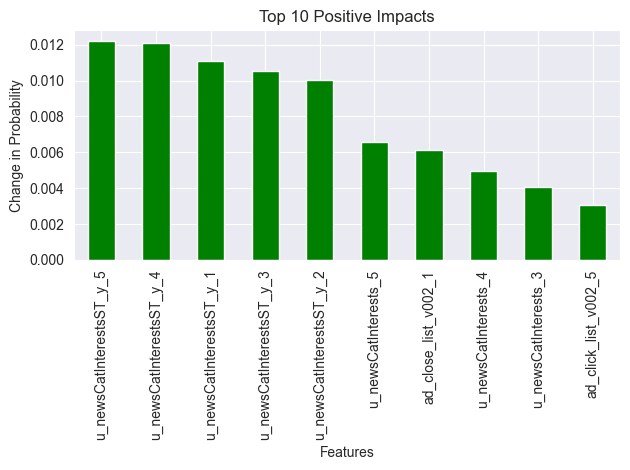

<Figure size 1000x600 with 0 Axes>

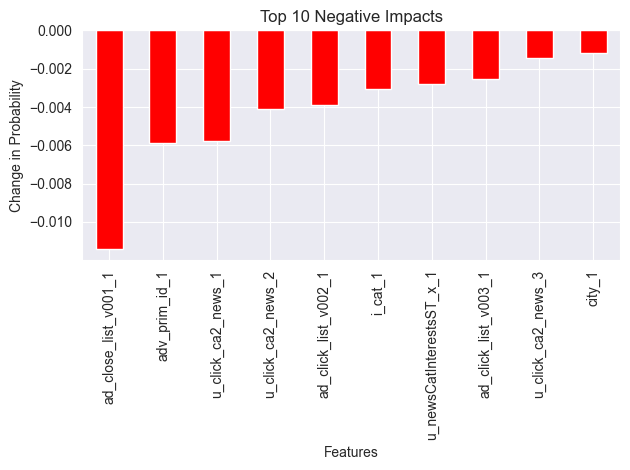

In [46]:
#change the dict type to df type
impact_df = pd.DataFrame.from_dict(impacts, orient='index', columns=['Change in Probability'])

# Split into positive and negative impacts, because both direction is meaningful
positive_impacts = impact_df[impact_df['Change in Probability'] > 0].sort_values(by='Change in Probability', ascending=False).head(10)
negative_impacts = impact_df[impact_df['Change in Probability'] < 0].sort_values(by='Change in Probability', ascending=True).head(10)



# Plot the impacts
plt.figure(figsize=(10, 6))
positive_impacts.plot(kind='bar', color='green', legend=False)
plt.title('Top 10 Positive Impacts')
plt.xlabel('Features')
plt.ylabel('Change in Probability')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
negative_impacts.plot(kind='bar', color='red', legend=False)
plt.title('Top 10 Negative Impacts')
plt.xlabel('Features')
plt.ylabel('Change in Probability')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()